<a href="https://colab.research.google.com/github/sushantkumar-estech/Celsius-to-Fahrenheit-using-ANN/blob/master/Simple_Neural_Model_to_convert_Celsius_to_Fahrenheit_using_ANN_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP#0: Import Libraries

In [15]:
# !pip install tensorflow-gpu==2.0.0.alpha0

In [16]:
#Installing compatible tensorflow 
!pip install tensorflow
try:
  %tensorflow_version 1.x
except Exception:
  pass

In [17]:
#Importing required libraries for data processing and visualization

import tensorflow as tf
import pandas as pd
import seaborn as sns  # to plot images and statical version of data
import numpy as np
import matplotlib.pyplot as plt


In [18]:
print(tf.__version__)

1.15.2


## STEP #1: Import *Dataset*

In [19]:
#Mouting colab with the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
#Importing dataset from drive

temp_df = pd.read_csv('/content/drive/My Drive/ML_Dataset/Celsius to Fahrenheit/Celsius_Fahrenheit_dataset_1000.csv')

In [22]:
temp_df.head() #showing top rows

,Celsius,Fahrenheit
0,-67,-88.6
1,40,104.0
2,-97,-142.6
3,57,134.6
4,-50,-58.0


In [23]:
temp_df.tail(5) #last 5 rows of the dataset     

,Celsius,Fahrenheit
995,-80,-112.0
996,50,122.0
997,18,64.4
998,47,116.6
999,-67,-88.6


In [24]:
temp_df.describe() #description about dataset

,Celsius,Fahrenheit
count,1000.000000,1000.000000
mean,-0.029000,31.947800
std,57.334173,103.201511
min,-100.000000,-148.000000
25%,-50.000000,-58.000000
50%,-2.000000,28.400000
75%,50.000000,122.000000
max,100.000000,212.000000


In [25]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     1000 non-null   int64  
 1   Fahrenheit  1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


`## STEP #2: Visualization of Dataset`

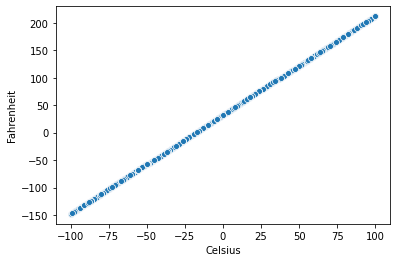

In [26]:
sns.scatterplot(temp_df['Celsius'], temp_df['Fahrenheit'])

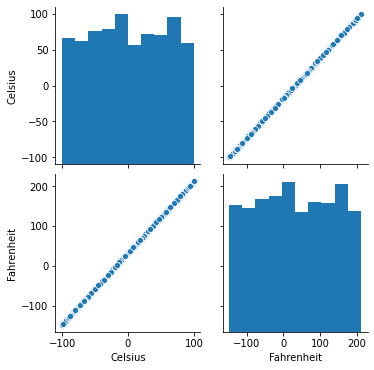

In [41]:
import seaborn as sns
sns.pairplot(temp_df)

## STEP #3: Creating Training & Testing Dataset

In [27]:
X_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

## STEP #4: Build & Train the Model

In [28]:
X_train.shape

(1000,)

In [29]:
y_train.shape

(1000,)

In [71]:
# in tensorflow 2.0, keras API come automatically with tensorflow 2.0
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units= 32 , input_shape = (1,)))
#Dense when we have fully connected atificial neural network
# now we are adding one more layer to the network
model.add(tf.keras.layers.Dense(units = 32))
# now adding the output layer
model.add(tf.keras.layers.Dense(units = 1))

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.compile(optimizer= tf.keras.optimizers.Adam(1), loss = 'mean_squared_error')

In [74]:
epochs_hist = model.fit(X_train, y_train, epochs=50, validation_split = 0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/50
800/800 [==============================] - 0s 295us/sample - loss: 1731067311.1385 - val_loss: 444755558.4000
Epoch 2/50
800/800 [==============================] - 0s 60us/sample - loss: 278420110.9300 - val_loss: 82649298.2400
Epoch 3/50
800/800 [==============================] - 0s 57us/sample - loss: 15448782.9563 - val_loss: 6406087.8400
Epoch 4/50
800/800 [==============================] - 0s 54us/sample - loss: 1195590.4924 - val_loss: 189733.5350
Epoch 5/50
800/800 [==============================] - 0s 54us/sample - loss: 68533.3001 - val_loss: 180.2395
Epoch 6/50
800/800 [==============================] - 0s 56us/sample - loss: 3967.8704 - val_loss: 225.3371
Epoch 7/50
800/800 [==============================] - 0s 60us/sample - loss: 278.8441 - val_loss: 9.8461
Epoch 8/50
800/800 [==============================] - 0s 66us/sample - loss: 19.3658 - val_loss: 7.4723
Epoch 9/50
800/800 [==============================] - 0s 63

## STEP #5: Evaluating the Model

In [75]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

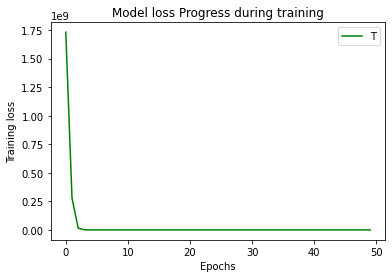

In [81]:
plt.plot(epochs_hist.history['loss'], color='green', label='Training loss')
plt.title('Model loss Progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend('Training loss')
plt.show()

Text(0, 0.5, 'Training loss')

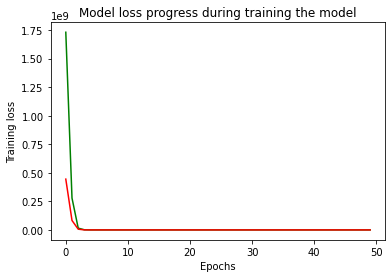

In [85]:
plt.plot(epochs_hist.history['loss'], color='green', label='Training loss')
plt.plot(epochs_hist.history['val_loss'], color='red', label='Validation loss')

plt.title('Model loss progress during training the model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')

In [78]:
model.get_weights()

[array([[ 0.612734  ,  0.69861853,  0.6208598 ,  0.00714685,  0.22173135,
          0.6793631 ,  0.64611334, -0.7793669 ,  0.08451042, -0.5547349 ,
         -0.09534116, -0.04580759,  0.7974303 ,  0.5421282 , -1.5703714 ,
          0.5985012 ,  0.7370004 ,  0.81689507,  0.5118943 , -0.47340032,
         -0.05661702,  0.68684983,  0.5782921 , -0.24966952,  0.6689062 ,
         -0.6756121 , -0.72590613, -0.12069906, -0.7979306 ,  0.25495073,
         -0.60469985,  0.14856605]], dtype=float32),
 array([-2.499687  ,  2.3874283 , -0.6988163 ,  7.775396  ,  7.8884053 ,
        -6.6003437 , -2.609023  ,  3.0606282 ,  7.5511856 ,  1.3679296 ,
         7.629556  , -7.413498  , -3.622821  , -1.9708722 ,  0.2721701 ,
        -0.37934333, -5.4792466 , -3.2409072 , -2.110751  ,  2.6367679 ,
        -7.8135147 ,  0.86941123, -1.3341639 , -7.449519  ,  1.2856417 ,
         1.0433358 ,  5.006688  ,  7.393956  , -1.1935246 ,  7.8369064 ,
        -2.6668432 ,  7.731227  ], dtype=float32),
 array([[-1.67

In [79]:
# Use the same model to perform predictions
Temp_C = 12
Temp_F = model.predict([Temp_C])
print('Temprature in Fahrenheit using simple ANN=', Temp_F)

Temprature in Fahrenheit using simple ANN= [[53.59942]]


In [80]:
# Lets confirm with the equation
Temp_F = 9/5 * Temp_C + 32
print('Temprature in Fahrenheit using normal equation=', Temp_F)

Temprature in Fahrenheit using normal equation= 53.6
